# Depositional mechanics with python
Today we will be learning how to use python to simulate a simple sediment deposition/erosion model in a river.

The libraries we will be using are `math, numpy, maplotlib, seaborn, pandas`.  

In [ ]:
import math;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import pandas as pd

### Creating a heatmap with seaborn
A heatmap is a 2D graph that uses color as its third dimension. An example looks like this

In [ ]:
heat=[
    [0,1,2,3,4],
    [5,6,7,8,9],
    [10,11,12,13,14]]

sns.heatmap(heat);

and of course, we can play around with the style using seaborn documentation and online examples.

In [ ]:
sns.heatmap(
    data=heat,
    annot=True,  #show the numbers
    cmap="viridis",  #use color map viridis
    linewidths=1,  #linewidth between blocks
    square=True,  # make them squares (not rectangles)
     )

#### Problem 1:
Make a heatmap of size 3 by 3 with a "hot center" and a 4 by 4 with a the color map "cubehelix"

In [ ]:
#Do it here!




### Formating data for input on heatmap
2D plots use one or 3 matrices as input. We have seen what happens if we give it one matrix. If we instead give it 3, it would require: 
- the $X$ values, 
- the $Y$ values and 
- the $heat(X,Y)$ values.

Before we do that let's start by making some bigger matrices for $X$ and $Y$

In [ ]:
# We first define the range of the x and y values
xrange=np.arange(0,3,0.5);
yrange=np.arange(0,10,5);

#then we make them into matrices
X,Y=np.meshgrid(xrange,yrange);

print(X);
sns.heatmap(X);
plt.show();

print(Y);
sns.heatmap(Y);
plt.show();

Now that we have made the coordinates, we will make a function for the heatmap    

In [ ]:
#remember we define functions with def
def James(xmatrix,ymatrix):
    return xmatrix+ymatrix; #adds the matrices

#we make the heat matrix with the matrices X, Y  and the function
Z=James(X,Y);

print(Z);
sns.heatmap(Z);
plt.show();

now that good and all, but those axis aren't $X$ and $Y$. To solve this we will use a pandas dataframe and a pivot table.

In [ ]:
#we make a dictionary with the X Y and Z values and give it to pandas df
Zdf=pd.DataFrame( {"x": X.flatten() ,"y":Y.flatten(),"z": Z.flatten()} );
display(Zdf);

#make a pivot table because... that's how it is
heat=Zdf.pivot_table(columns="x",index="y",values="z");

#show
sns.heatmap(heat);
plt.show()

#### Problem 2
Make a heat map with the function 
$$elevation(x,y)=100+2x-y$$ 
on the range from $20<x<30$ and $200<y<300$. (use the grid size you think appropiate)

In [ ]:
#Here are the steps if you're feeling overwhelm follow this steps
#1 make a mesh/grid



#2 define your functions and save your heat values



#3 make the df and the pivot table



#4 display your results! 




### Vector fields with quiver
So, what if instead you had to put an arrow at every point? a.k.a. a vector field. You need the $(x,y)$ location of the arrow and the $(u,v)$ components of the vectors. 

Lets start by making the $X$ and $Y$ components as before

In [198]:
xrange=np.arange(0,10,0.25);
yrange=np.arange(0,5,0.25);

X,Y=np.meshgrid(xrange,yrange);

now we define the $U$ and $V$ components of the vector field

In [ ]:
#define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return xmatrix;

def Vcomp(xmatrix,ymatrix):
    return ymatrix*0;

#assing them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

finally, make a vector field with the `quiver` function

In [ ]:
axis=plt.quiver(X,Y,U,V)

#make it look a little bit better

#axis=plt.gca();
#axis.set_xlim([-0.5,11]);
#axis.set_yticks(range(5));


#### Problem 3
Make a vector field of arrows poiting up. (feel free to pick any range)

In [ ]:
#Me wants vector field!




### Exner equation: erosion and deposition of sediment

Acording to wikipedia: 

&emsp; "The Exner equation describes conservation of mass between sediment in the bed of a channel and sediment that is being transported"

$$ \frac{\partial \eta}{\partial t}=-\frac{1}{\varepsilon_0}\nabla\cdot q_s$$

where $\eta(x,y)=\eta$ is the elevation and $q_s(x,y)=(U_q,V_q)$ is the vector field of sediment flux.

We will try to undestand deposition and erosion on a flat surface where the sediment flux is changing. We will use our old range and make a new sediment flux

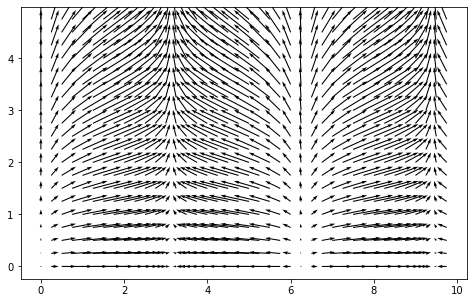

In [199]:
#define functions of the vector at every (x,y) location
def Uflux(xmatrix,ymatrix):
    return np.sin(xmatrix)*2;
    
def Vflux(xmatrix,ymatrix):
    return ymatrix/3;

#assing them
U=Uflux(X,Y)
V=Vflux(X,Y)

plt.quiver(X,Y,U,V,scale=30)

Here's a function that we will be using to apply exner's equation to the flux to find the places where deposition and erosion happen. 

In [162]:
#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape;
    dx=X[0][1]-X[0][0];
    dy=Y[1][0]-Y[0][0];

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ];
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ];
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy);

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ]);
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ]);

    return Xs,Ys,dh;

And now we will pass our vector field to this function and plot the erosion/deposition heatmap $\Delta \eta$ 

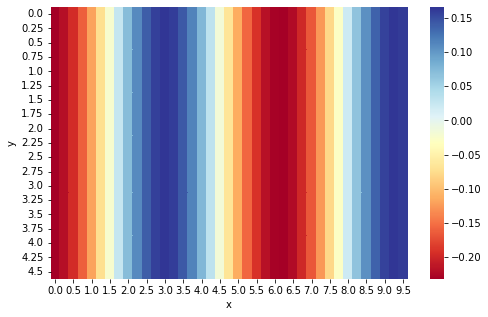

In [200]:
#use the function on the flux
newx,newy,deltah=ExnerCalculator(X,Y,U,V);

#plot the heatmap
erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} );
erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion");
sns.heatmap(erosion_table,cmap="RdYlBu");

Now let's see it next to the quiver again

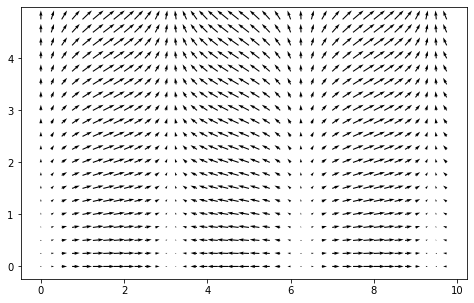

In [201]:
plt.quiver(X,Y,U,V);

## Homework
1. Plot the vector field $q=(U,V)$ in the domain from $-1<x<1$ and $-1<y<1$ given by
     $$U=-X$$
     $$V=-Y$$

2. Use the `ExnerCalculator` function to display an erosional/deposition heatmap for the change in elevation $\Delta \eta$

3. Given the data of the three variables $weight, height$ and $age$ below, find the correlation matrix between them and make a heatmap of the correlation matrix. (check the correlation example in https://python-graph-gallery.com/90-heatmaps-with-various-input-format )

In [220]:
weight=[162.22, 156.12, 169.31, 179.76, 173.12, 165.66, 166.61, 170.91, 156.67, 170.94];
height=[7.8954, 7.7507, 7.7312, 7.9815, 7.8738, 7.6802, 7.7422, 7.8297, 7.8992, 7.9033];
age=[32, 33, 22, 45, 33, 49, 36, 20, 41, 25];